# Capital Bikeshare

In [112]:
%matplotlib inline
import re, os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
from IPython.display import display

In [3]:
import sys; sys.path.insert(1, os.path.join(sys.path[0], '..'))
from utils.bikeshare import get_bikeshare_filename, get_year_quarter_tuples, download_bikeshare_data

In [4]:
years = [2015, 2016]
#years = [2010]
data_folder = "../data/bikeshare/"
os.makedirs(data_folder, exist_ok=True)

print("Downloading Capital Bikeshare Data for {years} to {folder}".format(years=years, folder=data_folder))
print()

for year, quarter in get_year_quarter_tuples(years):
    download_bikeshare_data(year, quarter, data_folder)


Data Exists: 2015 Q1 | ../data/bikeshare/2015-Q1-cabi-trip-history-data.csv
Data Exists: 2015 Q2 | ../data/bikeshare/2015-Q2-cabi-trip-history-data.csv
Data Exists: 2015 Q3 | ../data/bikeshare/2015-Q3-cabi-trip-history-data.csv
Data Exists: 2015 Q4 | ../data/bikeshare/2015-Q4-cabi-trip-history-data.csv
Data Exists: 2016 Q1 | ../data/bikeshare/2016-Q1-cabi-trip-history-data.csv


In [5]:
df_2016_q1 = pd.read_csv("../data/bikeshare/2016-Q1-cabi-trip-history-data.csv")
# df_2015_q4 = pd.read_csv("../data/bikeshare/2015-Q4-cabi-trip-history-data.csv")
# df_2015_q3 = pd.read_csv("../data/bikeshare/2015-Q3-cabi-trip-history-data.csv")
# df_2015_q2 = pd.read_csv("../data/bikeshare/2015-Q2-cabi-trip-history-data.csv")
# df_2015_q1 = pd.read_csv("../data/bikeshare/2015-Q1-cabi-trip-history-data.csv")

In [6]:
df_2016_q1.head()

,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member Type
0,301295,3/31/2016 23:59,4/1/2016 0:04,31280,11th & S St NW,31506,1st & Rhode Island Ave NW,W00022,Registered
1,557887,3/31/2016 23:59,4/1/2016 0:08,31275,New Hampshire Ave & 24th St NW,31114,18th St & Wyoming Ave NW,W01294,Registered
2,555944,3/31/2016 23:59,4/1/2016 0:08,31101,14th & V St NW,31221,18th & M St NW,W01416,Registered
3,766916,3/31/2016 23:57,4/1/2016 0:09,31226,34th St & Wisconsin Ave NW,31214,17th & Corcoran St NW,W01090,Registered
4,139656,3/31/2016 23:57,3/31/2016 23:59,31011,23rd & Crystal Dr,31009,27th & Crystal Dr,W21934,Registered


In [113]:
# df[(df.start_date.dt.dayofweek>=5)].start_date.dt.hour.value_counts().sort_index().plot()
# df[(df.start_date.dt.dayofweek<5)].start_date.dt.hour.value_counts().sort_index().plot()

    def read_bikeshare_data(year, quarter):
        filename = "../data/bikeshare/2015-Q1-cabi-trip-history-data.csv".format(
            year = year,
            quarter = quarter
        )
        df = pd.read_csv(filename)
    #     df.rename(columns={"Duration (ms)" : "duration", 
    #                        "Start date": "start_date", 
    #                       "End date": "end_date",
    #                       "Start station number" : "start_station_number",
    #                       "Start station" : "start_station",
    #                       "End station number" : "end_station_number",
    #                       "End station" : "end_station_number",
    #                       "Bike number" : "bike_number",
    #                       "Member Type" : "member_type"})
        df.rename(columns={
                     "duration (ms)" : "duration",
                    "bike number" : "bike",
                    "bike #" : "bike"}, inplace=True)
        df.rename(columns = lambda x: "_".join(x.split()), inplace=True)

    #     df['start_date'] = pd.to_datetime(df.start_date, infer_datetime_format=True)
    #     df['end_date'] = pd.to_datetime(df.end_date, infer_end_format=True)

    #     return df

In [8]:
def read_bikeshare_data(year, quarter):
    filename = "../data/bikeshare/{year}-Q{quarter}-cabi-trip-history-data.csv".format(
        year=year,
        quarter=quarter
    )
    df = pd.read_csv(filename)
    df.rename(columns=lambda x: x.lower(), inplace=True)
    df.rename(columns={
                "duration (ms)": "duration",
                "bike number": "bike", 
                "bike #": "bike"}, inplace=True)
    df.rename(columns=lambda x: "_".join(x.split()), inplace=True)
    
    df['start_date'] = pd.to_datetime(df.start_date, infer_datetime_format=True)
    df['end_date'] = pd.to_datetime(df.end_date, infer_datetime_format=True)
    return df

In [10]:
df = read_bikeshare_data(2016, 1)

In [11]:
df.head()

,duration,start_date,end_date,start_station_number,start_station,end_station_number,end_station,bike,member_type
0,301295,2016-03-31 23:59:00,2016-04-01 00:04:00,31280,11th & S St NW,31506,1st & Rhode Island Ave NW,W00022,Registered
1,557887,2016-03-31 23:59:00,2016-04-01 00:08:00,31275,New Hampshire Ave & 24th St NW,31114,18th St & Wyoming Ave NW,W01294,Registered
2,555944,2016-03-31 23:59:00,2016-04-01 00:08:00,31101,14th & V St NW,31221,18th & M St NW,W01416,Registered
3,766916,2016-03-31 23:57:00,2016-04-01 00:09:00,31226,34th St & Wisconsin Ave NW,31214,17th & Corcoran St NW,W01090,Registered
4,139656,2016-03-31 23:57:00,2016-03-31 23:59:00,31011,23rd & Crystal Dr,31009,27th & Crystal Dr,W21934,Registered


# two ways to return rows with NULL value in any of the columns

In [111]:
from functools import reduce
null = df[df.isnull().any(axis = 1)]
null = df[reduce(lambda x, y: x | y, df.isnull().values.T)]

,duration,start_date,end_date,start_station_number,start_station,end_station_number,end_station,bike,member_type


In [39]:
def parse_duration(x):
    h, m, s = x.split(" ")
    h = int(h.replace("h", ""))
    m = int(m.replace("min.", "")) #.replace("m", "")
    s = int(s.replace("sec.", "")) #.replace("s", "")
    
    total_seconds = h * 3600 + m * 60 + s
    total_milliseconds = 1000 * total_seconds
    
    return total_milliseconds

In [53]:
read_bikeshare_data(2015, 1)
read_bikeshare_data(2015, 2)
read_bikeshare_data(2015, 3)
read_bikeshare_data(2015, 4)
read_bikeshare_data(2016, 1)
None 

In [48]:
df_2015_q1 = read_bikeshare_data(2015, 1)
df_2015_q2 = read_bikeshare_data(2015, 2)
df_2015_q3 = read_bikeshare_data(2015, 3)
df_2015_q4 = read_bikeshare_data(2015, 4)
# df_2016_q1 = read_bikeshare_data(2016, 1)

In [49]:
df2015 = df_2015_q1.append([df_2015_q2, df_2015_q3, df_2015_q4], ignore_index=True)

In [42]:
display(df_2015_q3.head(1))
display(df_2015_q4.head(1))
display(df_2016_q1.head(1))

,duration,start_date,end_date,start_station_number,start_station,end_station_number,end_station,bike,member_type
0,257866,2015-07-01,2015-07-01 00:04:00,31116,California St & Florida Ave NW,31117,15th & Euclid St NW,W21516,Registered


,duration,start_date,end_date,start_station_number,start_station,end_station_number,end_station,bike,member_type
0,166050,2015-10-01 00:01:00,2015-10-01 00:04:00,31602,Park Rd & Holmead Pl NW,31105,14th & Harvard St NW,W21109,Registered


,duration,start_date,end_date,start_station_number,start_station,end_station_number,end_station,bike,member_type
0,301295,2016-03-31 23:59:00,2016-04-01 00:04:00,31280,11th & S St NW,31506,1st & Rhode Island Ave NW,W00022,Registered


In [43]:
dfs = [df_2015_q3, df_2015_q4, df_2016_q1]

In [44]:
for df in dfs:
    print(len(df), "observations")
    display(df.head(1))

1056366 observations


,duration,start_date,end_date,start_station_number,start_station,end_station_number,end_station,bike,member_type
0,257866,2015-07-01,2015-07-01 00:04:00,31116,California St & Florida Ave NW,31117,15th & Euclid St NW,W21516,Registered


706004 observations


,duration,start_date,end_date,start_station_number,start_station,end_station_number,end_station,bike,member_type
0,166050,2015-10-01 00:01:00,2015-10-01 00:04:00,31602,Park Rd & Holmead Pl NW,31105,14th & Harvard St NW,W21109,Registered


552399 observations


,duration,start_date,end_date,start_station_number,start_station,end_station_number,end_station,bike,member_type
0,301295,2016-03-31 23:59:00,2016-04-01 00:04:00,31280,11th & S St NW,31506,1st & Rhode Island Ave NW,W00022,Registered


In [50]:
df = pd.concat(dfs, axis=0, ignore_index=True)
len(df)

2314769

In [52]:
df.head()

,duration,start_date,end_date,start_station_number,start_station,end_station_number,end_station,bike,member_type
0,257866,2015-07-01 00:00:00,2015-07-01 00:04:00,31116,California St & Florida Ave NW,31117,15th & Euclid St NW,W21516,Registered
1,2683934,2015-07-01 00:00:00,2015-07-01 00:45:00,31247,Jefferson Dr & 14th St SW,31247,Jefferson Dr & 14th St SW,W00476,Casual
2,2349547,2015-07-01 00:02:00,2015-07-01 00:41:00,31247,Jefferson Dr & 14th St SW,31247,Jefferson Dr & 14th St SW,W20384,Casual
3,826571,2015-07-01 00:02:00,2015-07-01 00:16:00,31229,New Hampshire Ave & T St NW,31602,Park Rd & Holmead Pl NW,W00972,Registered
4,123046,2015-07-01 00:04:00,2015-07-01 00:06:00,31610,Eastern Market / 7th & North Carolina Ave SE,31269,3rd St & Pennsylvania Ave SE,W21565,Registered


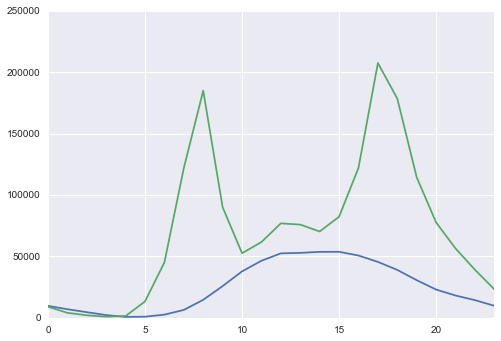

In [54]:
df[(df.start_date.dt.dayofweek>=5)].start_date.dt.hour.value_counts().sort_index().plot()
df[(df.start_date.dt.dayofweek<5)].start_date.dt.hour.value_counts().sort_index().plot()

In [12]:
df.head()

,duration,start_date,end_date,start_station_number,start_station,end_station_number,end_station,bike,member_type
0,301295,2016-03-31 23:59:00,2016-04-01 00:04:00,31280,11th & S St NW,31506,1st & Rhode Island Ave NW,W00022,Registered
1,557887,2016-03-31 23:59:00,2016-04-01 00:08:00,31275,New Hampshire Ave & 24th St NW,31114,18th St & Wyoming Ave NW,W01294,Registered
2,555944,2016-03-31 23:59:00,2016-04-01 00:08:00,31101,14th & V St NW,31221,18th & M St NW,W01416,Registered
3,766916,2016-03-31 23:57:00,2016-04-01 00:09:00,31226,34th St & Wisconsin Ave NW,31214,17th & Corcoran St NW,W01090,Registered
4,139656,2016-03-31 23:57:00,2016-03-31 23:59:00,31011,23rd & Crystal Dr,31009,27th & Crystal Dr,W21934,Registered


# checking average duration for casual and registered users

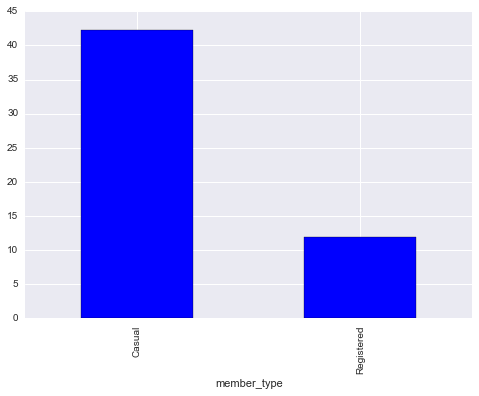

In [21]:
(df.groupby("member_type")['duration'].mean()/(60 * 1000)).plot(kind = 'bar')

# Average duration for each day of the week

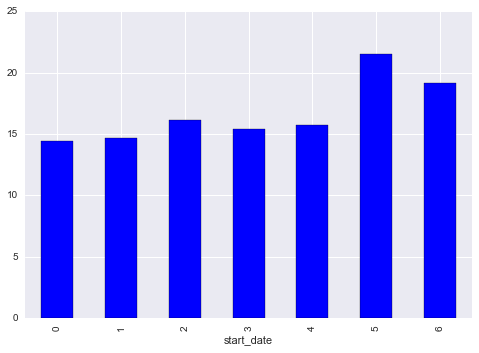

In [30]:
(df.groupby(df.start_date.dt.dayofweek)["duration"].mean()/(60 * 1000)).plot(kind = "bar")

# the amount of casual users for each day of the week


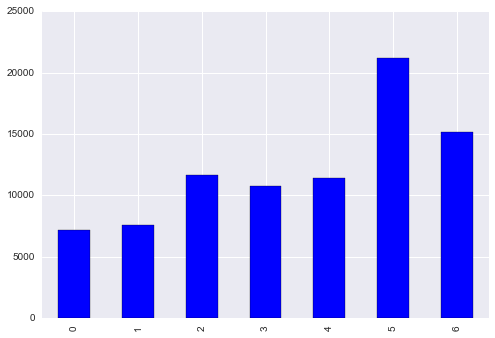

In [33]:
df[df.member_type == "Casual"].start_date.dt.dayofweek.value_counts().sort_index().plot(kind = "bar")

# daily use of bikes trend report

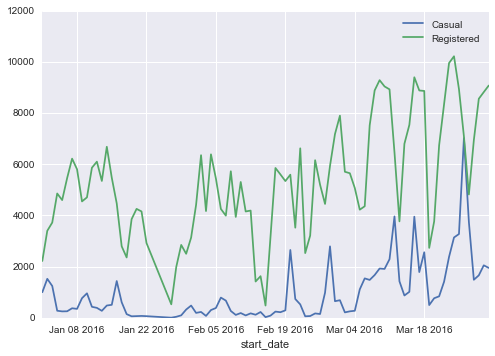

In [47]:
groups = df.groupby([df.start_date.dt.date, df.member_type])
groups.size().unstack().plot()
plt.legend(loc = 'best')

# duration relation with hour

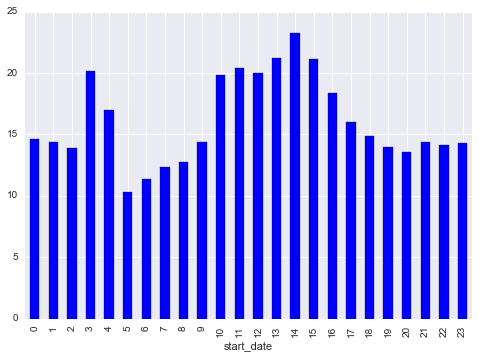

In [99]:
(df.groupby(df.start_date.dt.hour)['duration'].mean()/(60 * 1000)).plot(kind = "bar")

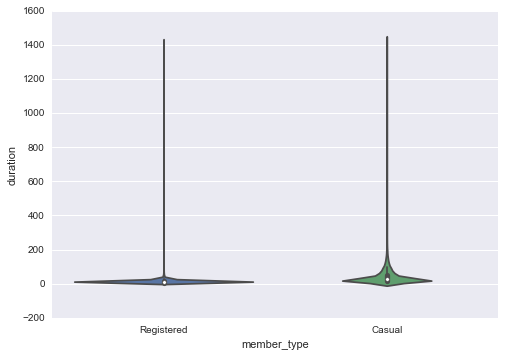

In [103]:
import seaborn as sb
sb.violinplot(x = "member_type", y = df.duration/(60 * 1000) , data = df)

# monthly usage plot of 2015

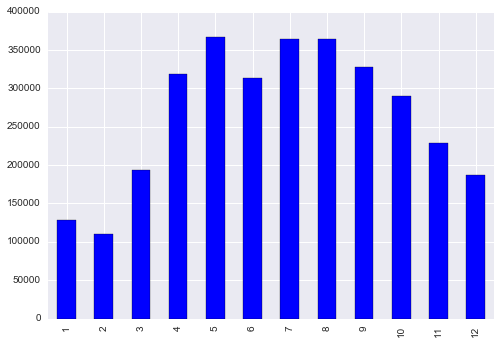

In [53]:
df2015.start_date.dt.month.value_counts().sort_index().plot(kind = "bar")

# Top 10 long duration start stations

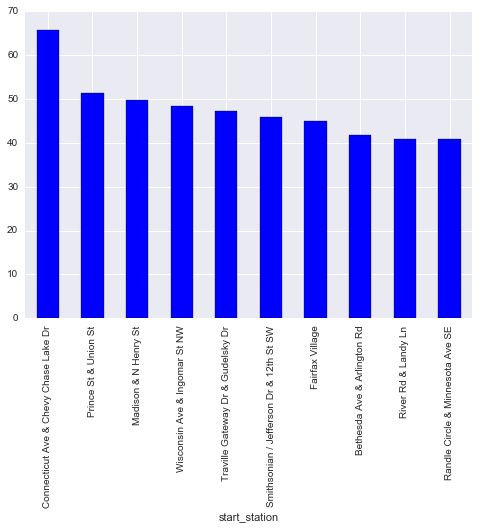

In [71]:
groups = (df.groupby(df.start_station).duration.mean()/(60 * 1000))
groups.sort_values(ascending=False)[:10].plot(kind = "bar")

In [76]:
top = groups.sort_values(ascending=False).index[0]

In [81]:
long_stat = df[df.start_station == top]
long_stat.shape

(87, 9)

# Top 10 popular stations for casual riders

In [27]:
df[df.member_type == "Casual"].start_station.value_counts()[:10]

Lincoln Memorial                                    7272
Jefferson Dr & 14th St SW                           5910
Jefferson Memorial                                  2964
Smithsonian / Jefferson Dr & 12th St SW             2922
Maryland & Independence Ave SW                      2052
Ohio Dr & West Basin Dr SW / MLK & FDR Memorials    1972
New York Ave & 15th St NW                           1956
Constitution Ave & 2nd St NW/DOL                    1630
19th St & Constitution Ave NW                       1373
10th St & Constitution Ave NW                       1343
Name: start_station, dtype: int64

In [28]:
df[df.member_type == "Registered"].start_station.value_counts()[:10]

Columbus Circle / Union Station                        12085
Massachusetts Ave & Dupont Circle NW                    8262
15th & P St NW                                          7007
Thomas Circle                                           6632
New Hampshire Ave & T St NW                             6241
14th & V St NW                                          6227
17th & Corcoran St NW                                   5249
Eastern Market Metro / Pennsylvania Ave & 7th St SE     5176
5th & K St NW                                           5168
14th & R St NW                                          4492
Name: start_station, dtype: int64

In [23]:
rare = df.start_station.value_counts(ascending=True)[:10]
rare

Crabbs Branch Way & Redland Rd                         1
Broschart & Blackwell Rd                               2
Nannie Helen Burroughs Ave & 49th St NE                3
Needwood Rd & Eagles Head Ct                           4
Traville Gateway Dr & Gudelsky Dr                      7
Nannie Helen Burroughs & Minnesota Ave NE              8
Benning Rd & East Capitol St NE / Benning Rd Metro     9
Key West Ave & Siesta Key Way                         10
Frederick Ave & Horners Ln                            10
Deanwood Rec Center                                   11
Name: start_station, dtype: int64

In [25]:
most = df.start_station.value_counts()[:10]
most

Columbus Circle / Union Station                        13120
Massachusetts Ave & Dupont Circle NW                    9560
Lincoln Memorial                                        9388
Jefferson Dr & 14th St SW                               8138
Thomas Circle                                           7479
15th & P St NW                                          7401
14th & V St NW                                          6568
New Hampshire Ave & T St NW                             6491
Eastern Market Metro / Pennsylvania Ave & 7th St SE     5649
17th & Corcoran St NW                                   5514
Name: start_station, dtype: int64

In [114]:
df.shape

(552399, 9)

In [115]:
dfemma = df.sample(frac=.02)

In [120]:
dfemma.to_excel(excel_writer = "Capital_Bike.xls",sheet_name= "2016Q1data(random sized)")

In [118]:
pwd

'/Users/jianglongli/Desktop/GA/DAT-DC-12/workspace'

In [121]:
pwd

'/Users/jianglongli/Desktop/GA/DAT-DC-12/workspace'